In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [14]:
df = pd.read_csv('merge.csv')

# Basic Data Review

In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize',
       'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran',
       'citizen', 'wgtpercy', 'VAW'],
      dtype='object')

In [16]:
df.head(10)

,Unnamed: 0,id,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,...,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy,VAW
0,0,2.628620e+26,2012.1,2012,4,2,1,1,6,7,...,2,3,1,-1,2,2,-2,-1,1500.484830,NaN
1,1,2.628620e+26,2012.1,2012,1,2,1,1,6,7,...,2,3,1,-1,3,3,-2,-1,1614.986090,NaN
2,2,2.628620e+26,2012.1,2012,5,2,2,1,1,7,...,1,3,2,-1,5,7,-2,-1,1558.220390,NaN
3,3,2.628620e+26,2012.1,2012,2,2,2,1,1,7,...,1,3,2,-1,4,4,-2,-1,2467.834745,NaN
4,4,2.628620e+26,2012.1,2012,2,2,1,1,6,3,...,5,3,1,-1,4,5,-2,-1,1608.344250,NaN
5,5,2.628620e+26,2012.1,2012,4,2,1,1,6,5,...,2,4,1,-1,4,4,-2,-1,1383.272280,NaN
6,6,2.628620e+26,2012.1,2012,5,2,2,2,2,88,...,5,1,1,-1,4,4,-2,-1,1663.348400,NaN
7,7,2.628620e+26,2012.1,2012,4,2,2,1,1,7,...,1,3,3,-1,5,6,-2,-1,1447.009280,NaN
8,8,2.628620e+26,2012.1,2012,6,2,2,1,1,7,...,1,3,3,-1,4,5,-2,-1,1253.206595,NaN
9,9,2.628620e+26,2012.1,2012,6,2,2,1,1,88,...,5,3,1,-1,5,6,-2,-1,1175.954570,NaN


In [17]:
df.isnull().sum()

Unnamed: 0              0
id                      0
yearq                   0
year                    0
ager                    0
sex                     0
hispanic                0
race                    0
race_ethnicity          0
hincome1                0
hincome2                0
marital                 0
popsize                 0
region                  0
msa                     0
locality                0
educatn1                0
educatn2                0
veteran                 0
citizen                 0
wgtpercy                0
VAW               1048446
dtype: int64

# Data Cleaning

In [18]:
df = df.drop(columns=['Unnamed: 0'])

In [19]:
df[df['id'].duplicated()]

,id,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy,VAW
1,2.628620e+26,2012.1,2012,1,2,1,1,6,7,-1,...,2,3,1,-1,3,3,-2,-1,1614.986090,NaN
2,2.628620e+26,2012.1,2012,5,2,2,1,1,7,-1,...,1,3,2,-1,5,7,-2,-1,1558.220390,NaN
3,2.628620e+26,2012.1,2012,2,2,2,1,1,7,-1,...,1,3,2,-1,4,4,-2,-1,2467.834745,NaN
4,2.628620e+26,2012.1,2012,2,2,1,1,6,3,-1,...,5,3,1,-1,4,5,-2,-1,1608.344250,NaN
5,2.628620e+26,2012.1,2012,4,2,1,1,6,5,-1,...,2,4,1,-1,4,4,-2,-1,1383.272280,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101831,1.710400e+26,2019.3,2019,6,2,2,1,1,7,4,...,0,1,2,-1,4,5,0,1,644.434647,NaN
1101832,1.710280e+26,2019.4,2019,6,2,2,1,1,7,4,...,0,1,2,-1,4,5,0,1,644.434647,NaN
1101833,1.710200e+26,2019.4,2019,4,2,2,2,2,7,4,...,0,1,2,-1,5,8,0,2,941.167211,NaN
1101834,1.710200e+26,2019.4,2019,1,2,2,2,2,7,4,...,0,1,2,-1,4,4,-1,9,0.000000,NaN


Duplicates are ignored due to multiple offenders/ multiple reports by the same person

In [20]:
df['VAW'].value_counts()

VAW
1.0    53390
Name: count, dtype: int64

In [21]:
df['VAW'] = df['VAW'].fillna(0)
df['VAW'].value_counts()


VAW
0.0    1048446
1.0      53390
Name: count, dtype: int64

In [22]:
df.isnull().sum()

id                0
yearq             0
year              0
ager              0
sex               0
hispanic          0
race              0
race_ethnicity    0
hincome1          0
hincome2          0
marital           0
popsize           0
region            0
msa               0
locality          0
educatn1          0
educatn2          0
veteran           0
citizen           0
wgtpercy          0
VAW               0
dtype: int64

# Data Analysis

In [23]:
#visualisation Dataframe
dfv = pd.DataFrame()

In [30]:
dfv = df
dfv = dfv.drop_duplicates()
dfv

,id,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy,VAW
0,2.628620e+26,2012.1,2012,4,2,1,1,6,7,-1,...,2,3,1,-1,2,2,-2,-1,1500.484830,0.0
1,2.628620e+26,2012.1,2012,1,2,1,1,6,7,-1,...,2,3,1,-1,3,3,-2,-1,1614.986090,0.0
2,2.628620e+26,2012.1,2012,5,2,2,1,1,7,-1,...,1,3,2,-1,5,7,-2,-1,1558.220390,0.0
3,2.628620e+26,2012.1,2012,2,2,2,1,1,7,-1,...,1,3,2,-1,4,4,-2,-1,2467.834745,0.0
4,2.628620e+26,2012.1,2012,2,2,1,1,6,3,-1,...,5,3,1,-1,4,5,-2,-1,1608.344250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101831,1.710400e+26,2019.3,2019,6,2,2,1,1,7,4,...,0,1,2,-1,4,5,0,1,644.434647,0.0
1101832,1.710280e+26,2019.4,2019,6,2,2,1,1,7,4,...,0,1,2,-1,4,5,0,1,644.434647,0.0
1101833,1.710200e+26,2019.4,2019,4,2,2,2,2,7,4,...,0,1,2,-1,5,8,0,2,941.167211,0.0
1101834,1.710200e+26,2019.4,2019,1,2,2,2,2,7,4,...,0,1,2,-1,4,4,-1,9,0.000000,0.0


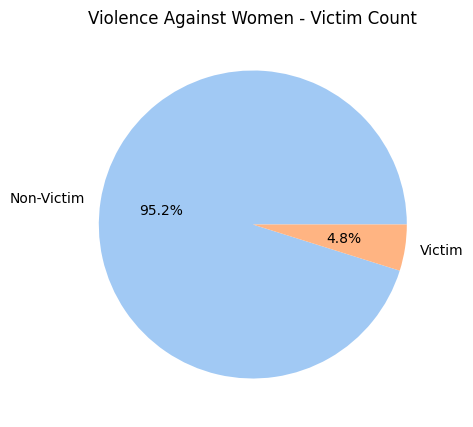

In [24]:
plt.figure(figsize=(5,5))
plt.title('Violence Against Women - Victim Count')
dict = {0:"Non-Victim",1:"Victim"}
dfv['VAW'] = [dict[row] for row in df['VAW']]
plt.pie(dfv['VAW'].value_counts().tolist(), labels=dfv['VAW'].unique().tolist(), colors=sns.color_palette('pastel'),autopct='%.1f%%')
plt.show()